In these tutorials we want to present how to simulate a general system using the AtomCalc modules.

# Simulating a Raman transition with constant lasers
This example shows how to simulate a Raman system. Feel free to change parameters and play around.

In [1]:
from atomcalc.fidelity import Level, Decay, Laser, System

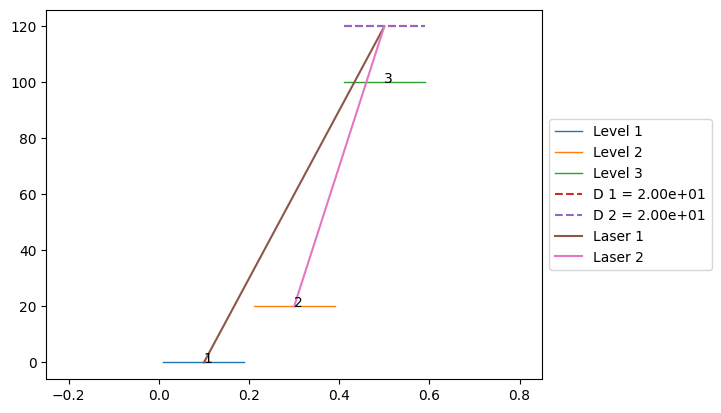

In [5]:
# define level objects
level1 = Level([0])
level2 = Level([20])
level3 = Level([100])

# define decay object
decay = Decay([0,0],[[level3,level1],[level3,level2]]) # no decay
# Alternatively: decay = Decay([0],[[level3,level1]]). It needs at least one entry.

# define parameters
Delta = 20
delta = 0
Omega1 = 1
Omega2 = 1

# define lasers (sort level couples from low to high energy.)
laser1 = Laser(Omega1, 100 + Delta, [level1,level3])
laser2 = Laser(Omega2, 80 + (Delta-delta), [level2,level3])

# define system (sort levels by energy in ascending order. The order of the lasers should not matter.)
system = System([level1,level2,level3], [laser1,laser2], decay)

# draw the system in matplotlib
system.draw()

Transformed Hamiltonian: Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0.   0.   0.5]
 [ 0.   0.   0.5]
 [ 0.5  0.5 20. ]]


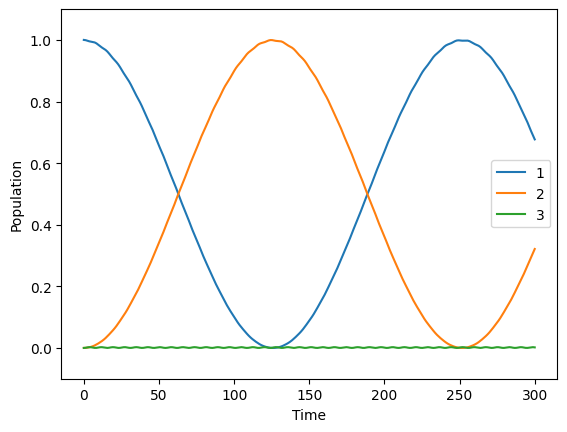

1.0

In [3]:
# calculate and show the time evolution
system.fidelity([1,0,0], 1, 300, Diagonalization=True)

# Simulating a Raman transition with laser pulses
Now we simulate the same system with a time-dependent Rabi frequency of both lasers.

In [6]:
from atomcalc.fidelity import Level, Decay, Laser, System, plot_pulse
import numpy as np

We use the same parameters as earlier

In [ ]:
# define level objects
level1 = Level([0])
level2 = Level([20])
level3 = Level([100])

# define decay object
decay = Decay([0,0],[[level3,level1],[level3,level2]]) # no decay

# define parameters
Delta = 20
delta = 0
Omega1 = 1
Omega2 = 1

We define the pulses as functions depending on t. Here, we define gaussian pulses.

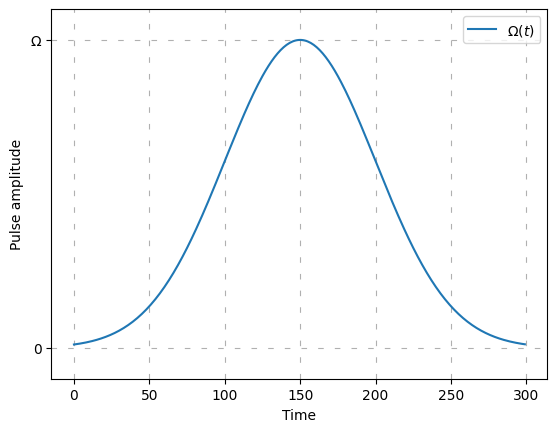

In [19]:
def pulse_1(t):
    return Omega1 * np.exp(-0.5 * ((t - 150) / (50)) ** 2)

def pulse_2(t):
    return Omega2 * np.exp(-0.5 * ((t - 150) / (50)) ** 2)

plot_pulse(pulse_1, range(0, 300, 1))

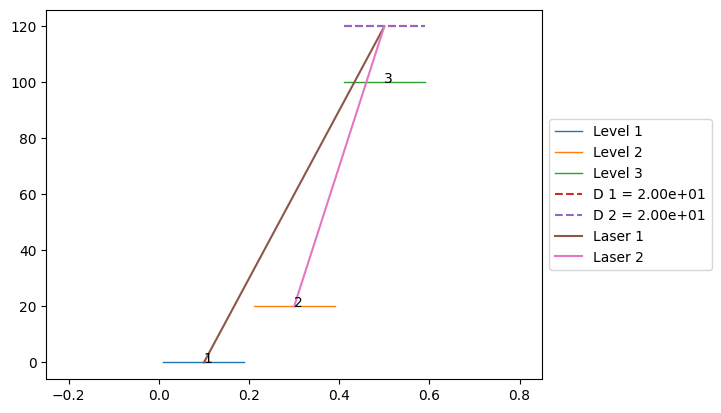

In [20]:
# System
laser1 = Laser(Omega1, 100 + Delta, [level1, level3], pulse=pulse_1)
laser2 = Laser(Omega2, 80 + (Delta - delta), [level2, level3], pulse=pulse_2)
system = System([level1, level2, level3], [laser1, laser2], decay)
system.draw()


The Trotterintervals determine how the pulse is discretized. In my master thesis this is explained in detail in the method and the appendix section.

Transformed Hamiltonian: [[ 0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j 20.+0.j]]
One trotterinterval has size 6.0.
One trotter step has size 3.0.
0


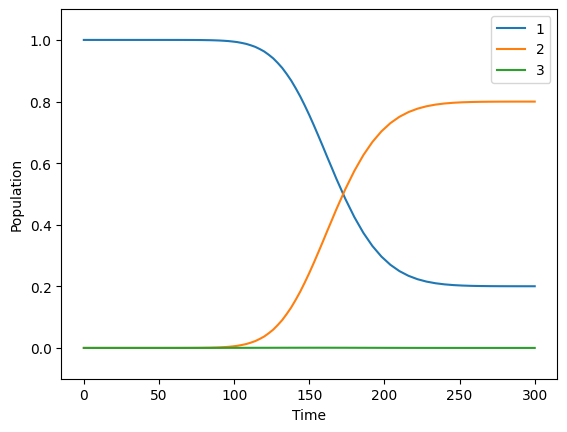

0.7997789543219783

In [21]:
# calculate and show the time evolution
system.fidelity([1, 0, 0],1,300,Diagonalization=True,Trotterintervals=50)

# Conveniently shifting the first level
Lastly, there is a convenient way to consider an additional detuning of the first level. This is equivalent to shifting all levels except the first in the contrary direction of this detuning and changing only the frequency of the lasers coupling to the first level. We look again at the Raman system with constant lasers.

In [9]:
from atomcalc.fidelity import Level, Decay, Laser, System

We define the same parameters as in the first example but with an additional detuning called shift.

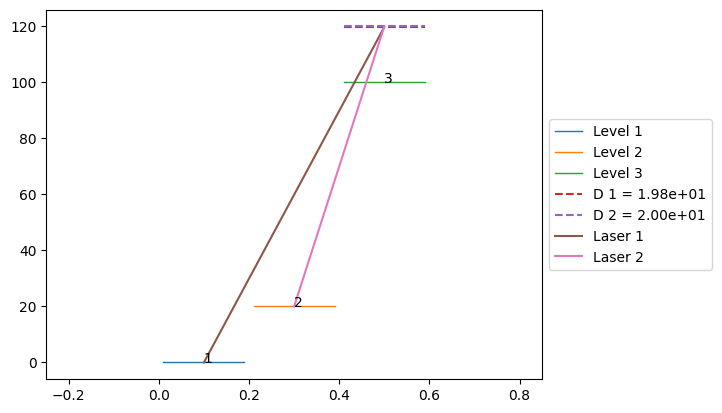

In [16]:
# define level objects
level1 = Level([0])
level2 = Level([20])
level3 = Level([100])

# define decay object
decay = Decay([0,0],[[level3,level1],[level3,level2]]) # no decay

# define parameters
Delta = 20
delta = 0
Omega1 = 1
Omega2 = 1
shift = 0.2 # <--- new detuning

# define lasers (sort level couples from low to high energy.)
laser1 = Laser(Omega1, 100 + (Delta-shift), [level1,level3]) # <--- Change the frequency of the laser coupling to level 1
laser2 = Laser(Omega2, 80 + (Delta-delta), [level2,level3])

# define system (sort levels by energy in ascending order. The order of the lasers should not matter.)
system = System([level1,level2,level3], [laser1,laser2], decay)

# draw the system in matplotlib
system.draw()

Note that the draw method shows this change only as a shorter line of Laser 1 still originating from a non-detuned level 1. Ideally it would draw this Laser 1 line from a detuning at the first level so that the dashed detuning lines D 1 and D 2 are on the same height again which is what the system represents. But the draw function is very rudimentary.

We use the delta_stark_shift option of the fidelity method to consider this shift in the simulation.

Transformed Hamiltonian: Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0.2  0.   0.5]
 [ 0.   0.   0.5]
 [ 0.5  0.5 20. ]]


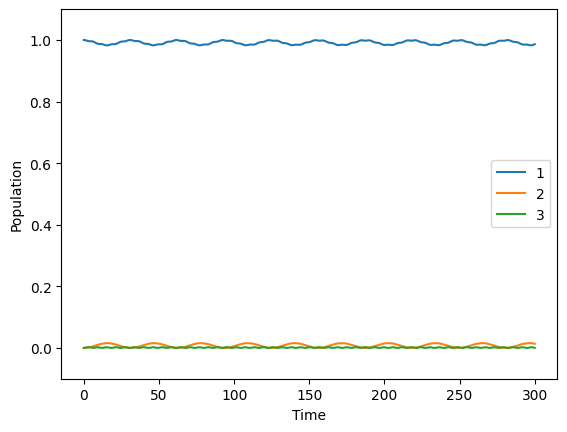

0.015647914604337877

In [17]:
# calculate and show the time evolution with the shift
system.fidelity([1,0,0], 1, 300, Diagonalization=True, delta_stark_shift=shift)